    Denne opgave er en del af NumPy-tutorials fra deres officielle hjemmeside. Du skal læse dokumentet igennem og lave så mange af øvelserne som muligt. Til sidst kan du finde alle svarene her:
https://numpy.org/numpy-tutorials/content/mooreslaw-tutorial.html
    
# Bestemmelse af Moore’s lov med rigtige data i NumPy
Gordon Moore fremsatte en empirisk forudsigelse om, at antallet af transistorer på en computerchip ville fordobles hvert andet år. Denne forudsigelse blev kendt som Moore’s lov. Gordon Moore havde oprindeligt kun forventet, at denne empiriske sammenhæng ville gælde fra 1965 til 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],men semiconductor producenter var i stand til at følge Moore’s lov helt frem til 2015.

I denne opgave skal du:

- Læs og analysere rigtige data for antal transistor i semiconductor over tid,
- Sammenligne Moores forudsigelse med de rigtige data,
- Visualisere udviklingen grafisk ved hjælp af NumPy og Matplotlib,

## Hvad du skal bruge
Du vil anvende disse NumPy- og Matplotlib-funktioner:

- `np.loadtxt`: indlæser tekst i et NumPy-array
- `np.log`: tager den naturlige logaritme af alle elementer i et NumPy-array
- `np.exp`: tager den eksponentielle funktion af alle elementer i et NumPy-array
- `lambda`: en minimal funktionsdefinition til at lave en model-funktion
- `plt.semilogy`: plotter x-y-data med lineær x-akse og logaritmisk y-akse
- `plt.plot`: plotter x-y-data med lineære akser
- `array-slicing`
- `boolean array indexing`
- `np.block`: kombiner arrays til 2D-arrays
- `np.newaxis`: ændrer et 1D-array til en række- eller kolonnevektor
- `np.savez` og `np.savetxt`: gemmer arrays i henholdsvis komprimeret NumPy-format og som tekst

## Del 1: læs data

I repo findes en CSV fil, "Moores_Law.csv" hentet fra [transistor count](http://www.transistorcount.com/#2020s)

1. Brug kommandoen `!head Moores_Law.csv` til at se de første linjer af CSV-filen. Hvad er overskrifterne for kolonnerne?
2. Indlæs CSV-filen. Du behøver ikke de kolonner, der angiver Processor, Designer, MOSprocess eller Area. Du skal kun bruge den anden og tredje kolonne, nemlig **Transistors** og **Date**. Dernæst skal du indlæse disse to kolonner i et NumPy-array `data` ved hjælp af `np.genfromtxt`. De ekstra indstillinger nedenfor sørger for, at data kommer i det ønskede format:

- delimiter=',': angiver komma ',' som separator i CSV-filen
- usecols=[1,2]: importerer den anden og tredje kolonne fra CSV-filen
- skip_header=1: springer den første række over, fordi den er en overskriftsrække (header)

In [10]:
!head Moores_Law.csv

Processor,Transistors,Year,Designer,Process,Area mm2,Trans./mm2
MOS Technology 6502,3510,1975,MOS Tech.,"8,000 nm",21,167
RCA 1802,5000,1974,RCA,"5,000 nm",27,185
Intel 4004,2300,1971,Intel,"10,000 nm",12,192
Intel 8080,4500,1974,Intel,"6,000 nm",20,225
Intel 8008,3500,1972,Intel,"10,000 nm",14,250
Motorola 6800,4100,1974,Motorola,"6,000 nm",16,256
Intel 8085,6500,1976,Intel,"3,000 nm",20,325
Motorola 6809,9000,1978,Motorola,"5,000 nm",21,429
Zilog Z80,8500,1976,Zilog,"4,000 nm",18,472


In [15]:
import numpy as np
data = np.genfromtxt('Moores_Law.csv', delimiter=',', usecols=[1,2], skip_header=1)

Du har nu indlæst hele historien om semiconductor i et NumPy-array kaldet `data`. Den første kolonne indeholder antallet af MOS-transistorer, og den anden kolonne indeholder introduktionsåret skrevet med fire cifre.

3. Du skal gøre dataene lettere at læse og arbejde med ved at tildele de to kolonner til variablerne `year` og `transistor_count`. Udskriv de første 10 værdier ved at anvende slicing [:10] på year- og transistor_count-arrays.
Udskriv derefter disse værdier for at tjekke, at du har gemt dataene i de rigtige variabler.

In [32]:
year = data[:,1]
year = year[~np.isnan(year)]
transistor_count = data[:,0]
transistor_count = transistor_count[~np.isnan(transistor_count)]

## Del 2: data analyse

1. Brug `np.log` til at tage den naturlige logaritme af antal transistor der gemmes i `transistor_count`.
2. Tegn et scatter-plot af årstal (x-akse) mod log-transistorantal (y-akse).
3. Hvad ser du? Passer punkterne nogenlunde til en ret linje?

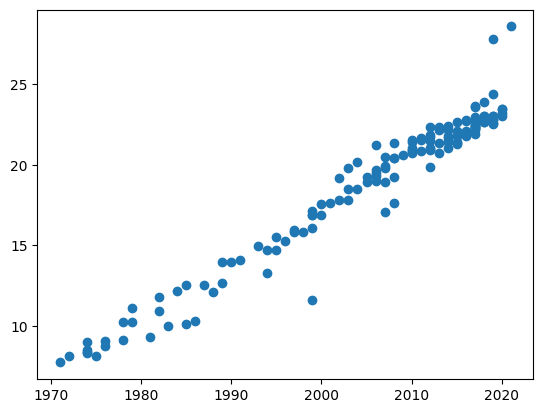

In [33]:
log_transistor_count = np.log(transistor_count)
import matplotlib.pyplot as plt
plt.scatter(year, log_transistor_count)

In [37]:
model = np.polynomial.Polynomial.fit(year, log_transistor_count, deg=1)
A, B = model
Moores_law = lambda year: np.exp(B_M)*np.exp(A_M*year)

transistor_
plt.plot

15.699940703939086


## Del 3: Sammenlign med Moore’s law
Din empiriske model antager, at antallet af transistorer pr. semiconductor følger en eksponentiel vækst,

$$ transistor\_count = a\cdot b^{t-t_0}$$ 

hvor $a$ og  $b$ konstanter, der beskriver en fordobling af antal transistor hvert andet år, og hvor udgangspunktet er 2250 transistorer i 1971. Funktionen kan afbildes som en ret linje i et enkeltlogaritmisk koordinatsystem

$$\log(transister\_count) = f(year) = A \cdot year+B$$

hvor $A$ and $B$ tilpasningskonstanter (fitting constants).


1. Compute $A$ and $B$ and make a function *Moores_law* using `lambda`, with *year* as input argument.
2. Brug `np.polyfit` til at lave et lineært fit på log-data:
3. Plot både de rigtige data (scatter) og regression modellen (kurve) i samme figur på log-skala
4. Tegn også Moore’s kurve i grafen og sammenlign med dine data.